# Librerías

In [2]:
pip install "git+https://github.com/openai/shap-e.git"

  Cloning https://github.com/openai/shap-e.git to /private/var/folders/yq/pqd8hwz96lq4v2_hsn2l7wq00000gp/T/pip-req-build-cvup1j48
  Running command git clone --filter=blob:none --quiet https://github.com/openai/shap-e.git /private/var/folders/yq/pqd8hwz96lq4v2_hsn2l7wq00000gp/T/pip-req-build-cvup1j48
  Resolved https://github.com/openai/shap-e.git to commit 50131012ee11c9d2617f3886c10f000d3c7a3b43
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/openai/CLIP.git to /private/var/folders/yq/pqd8hwz96lq4v2_hsn2l7wq00000gp/T/pip-install-sdi3sc0k/clip_c295aadf639e452db5cbfc5c4f96021b
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /private/var/folders/yq/pqd8hwz96lq4v2_hsn2l7wq00000gp/T/pip-install-sdi3sc0k/clip_c295aadf639e452db5cbfc5c4f96021b
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/

In [6]:
!sudo apt install blender=3.3.1

Password:
sudo: a password is required


In [3]:
import torch

from shap_e.models.download import load_model
from shap_e.util.data_util import load_or_create_multimodal_batch
from shap_e.util.notebooks import create_pan_cameras, decode_latent_images, gif_widget

# Latent

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
xm = load_model('transmitter', device=device)

  0%|          | 0.00/1.78G [00:00<?, ?iB/s]

In [8]:
model_path = "real.obj"

# This may take a few minutes, since it requires rendering the model twice
# in two different modes.
batch = load_or_create_multimodal_batch(
    device,
    model_path=model_path,
    mv_light_mode="basic",
    mv_image_size=256,
    cache_dir="example_data/cactus/cached",
    verbose=True, # this will show Blender output during renders
)

creating point cloud...
Blender 3.3.18 (hash ce642e790ac6 built 2024-04-15 23:41:41)
Read prefs: /Users/melissa/Library/Application Support/Blender/3.3/config/userpref.blend
(  0.0000 sec |   0.0000 sec) Importing OBJ 'real.obj'...
  (  0.0003 sec |   0.0003 sec) Parsing OBJ file...
    (  0.3570 sec |   0.3566 sec) Done, loading materials and images...
    (  0.3616 sec |   0.3613 sec) Done, building geometries (verts:51645 faces:103164 materials: 1 smoothgroups:0) ...
    (  0.5190 sec |   0.5187 sec) Done.
  (  0.5191 sec |   0.5190 sec) Finished importing: 'real.obj'
Progress: 100.00%

Fra:1 Mem:37.36M (Peak 38.49M) | Time:00:00.80 | Syncing real
Fra:1 Mem:46.03M (Peak 46.42M) | Time:00:01.13 | Syncing Light
Fra:1 Mem:46.03M (Peak 46.42M) | Time:00:01.13 | Syncing Light.001
Fra:1 Mem:46.03M (Peak 46.42M) | Time:00:01.13 | Syncing Camera
Fra:1 Mem:44.45M (Peak 46.42M) | Time:00:01.13 | Rendering 1 / 1 samples
Fra:1 Mem:36.89M (Peak 46.42M) | Time:00:01.72 | Compositing
Fra:1 Mem:36.

python(32631) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Blender 3.3.18 (hash ce642e790ac6 built 2024-04-15 23:41:41)
Read prefs: /Users/melissa/Library/Application Support/Blender/3.3/config/userpref.blend
(  0.0000 sec |   0.0000 sec) Importing OBJ 'real.obj'...
  (  0.0004 sec |   0.0004 sec) Parsing OBJ file...
    (  0.3235 sec |   0.3231 sec) Done, loading materials and images...
    (  0.3278 sec |   0.3274 sec) Done, building geometries (verts:51645 faces:103164 materials: 1 smoothgroups:0) ...
    (  0.4857 sec |   0.4853 sec) Done.
  (  0.4857 sec |   0.4857 sec) Finished importing: 'real.obj'
Progress: 100.00%

Fra:1 Mem:40.44M (Peak 41.56M) | Time:00:00.72 | Syncing real
Fra:1 Mem:49.10M (Peak 49.50M) | Time:00:01.07 | Syncing Camera
Fra:1 Mem:47.53M (Peak 49.50M) | Time:00:01.07 | Rendering 1 / 1 samples
Fra:1 Mem:39.96M (Peak 49.50M) | Time:00:01.51 | Compositing
Fra:1 Mem:39.97M (Peak 49.50M) | Time:00:01.51 | Compositing | Determining resolution
Fra:1 Mem:39.97M (Peak 49.50M) | Time:00:01.51 | Compositing | Initializing execu

In [10]:
with torch.no_grad():
    latent = xm.encoder.encode_to_bottleneck(batch)

    #render_mode = 'stf' # you can change this to 'nerf'
    #size = 128 # recommended that you lower resolution when using nerf

    #cameras = create_pan_cameras(size, device)
    #images = decode_latent_images(xm, latent, cameras, rendering_mode=render_mode)
    #display(gif_widget(images))

In [11]:
latent

tensor([[ 0.6944, -0.4192, -0.8722,  ..., -0.6921, -0.8512, -0.9982]])

In [12]:
latent.shape

torch.Size([1, 1048576])

In [16]:
import numpy as np
b = np.load('example_data/cactus/cached/pc_real.obj_mat_40_524288_16384.npz')
for i in b.keys(): print(i)

coords
R
G
B
A
MatAlpha


In [21]:
b['coords'].shape, b['R'].shape, b['MatAlpha'].shape

((16384, 3), (16384,), (16384,))

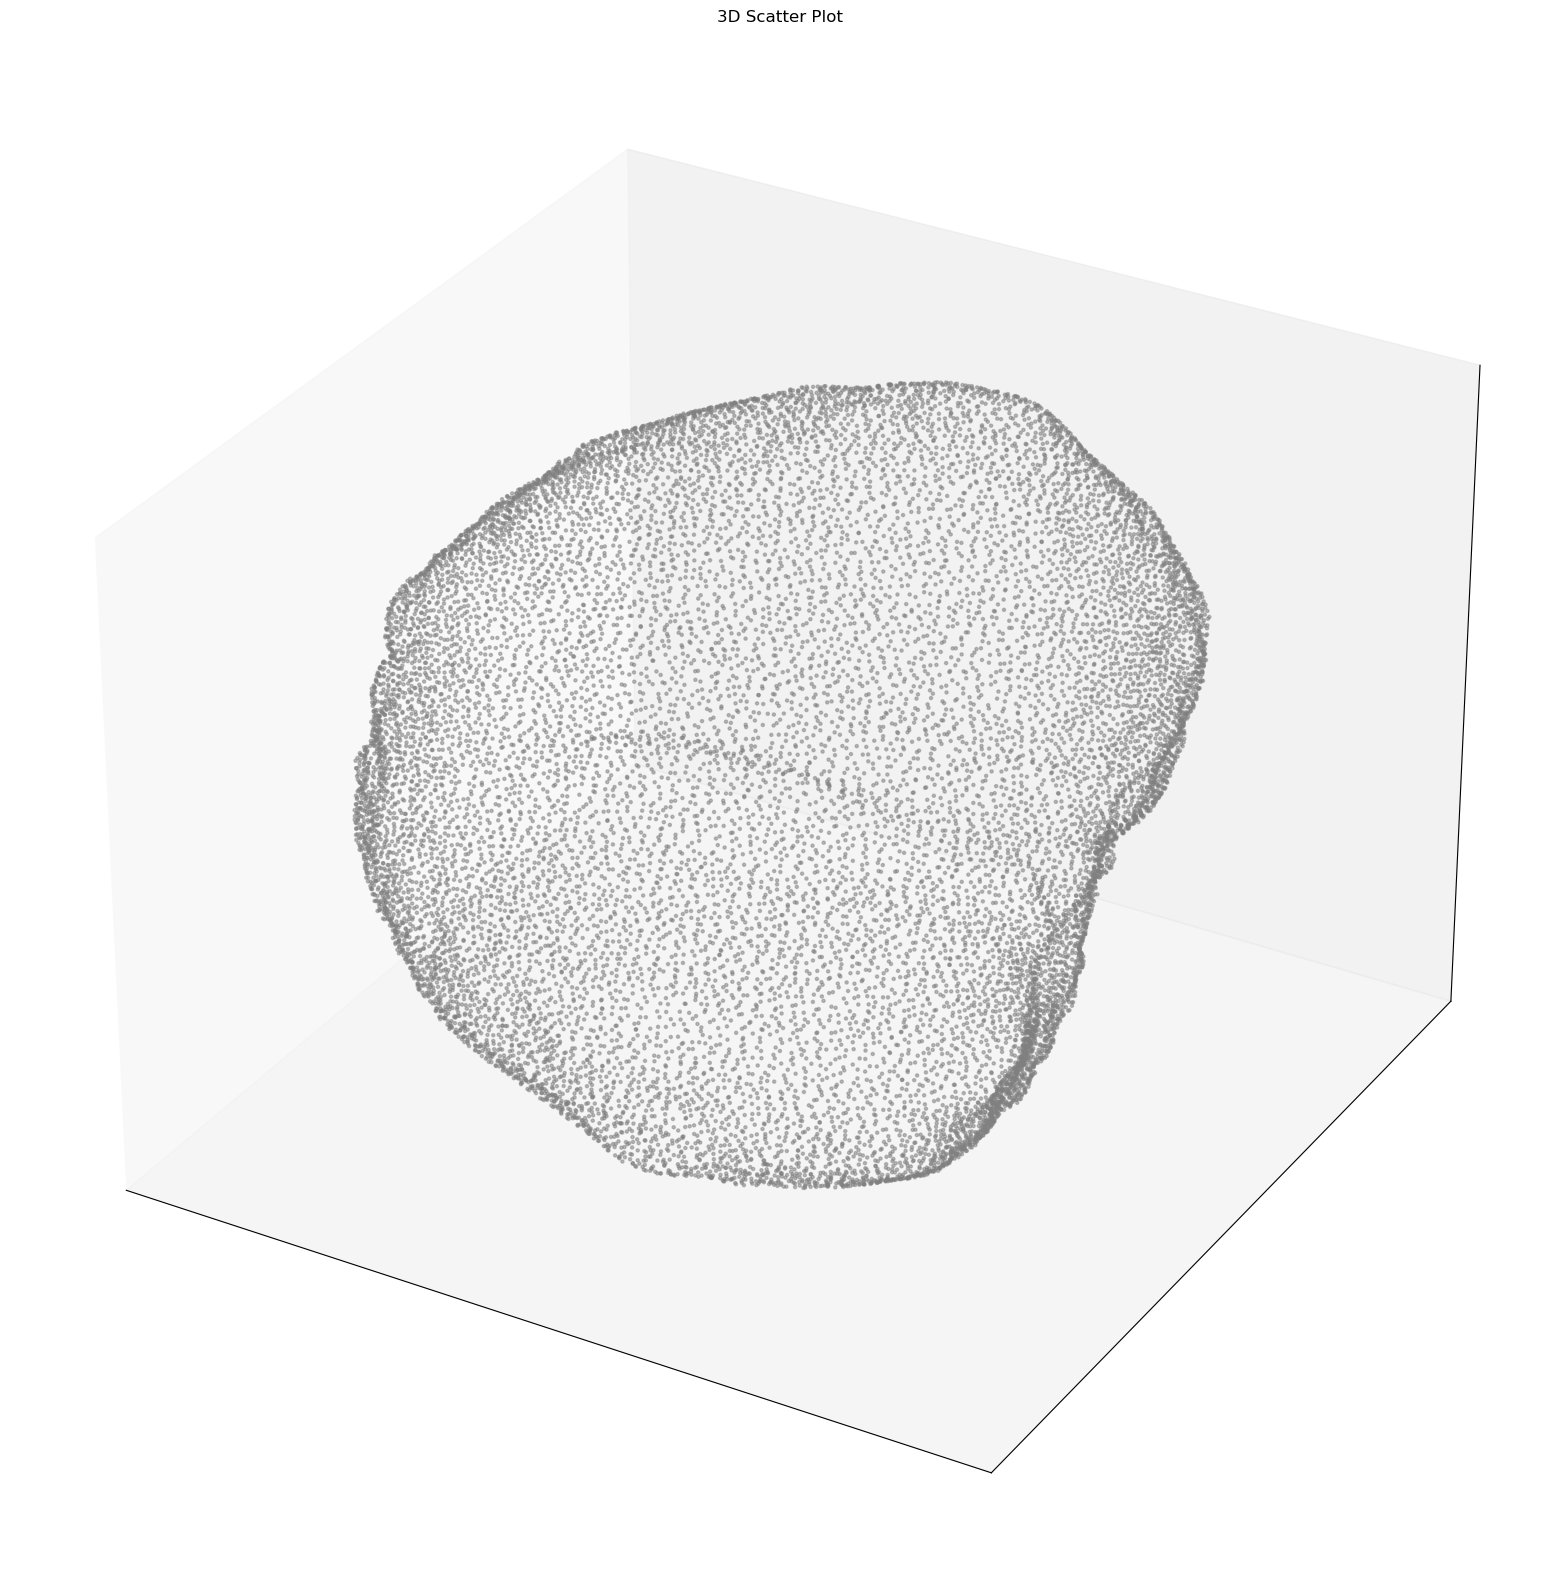

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate random data
num_points = 100
x = b['coords'][:,0]
y = b['coords'][:,1]
z = b['coords'][:,2]

# Create the figure and 3D axis
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(x, y, z, c='gray', marker='.',  alpha = 0.5)

# Set labels and title
ax.set_title('3D Scatter Plot')

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
# Show the plot
plt.show()


In [3]:
import pickle 

with open('../test_uids_2k.pkl', 'rb') as file:
    a = pickle.load(file)

len(a)

2000